CMPE-255 Assignment :
 K-means Clustering

Business value: To find which country has highest number of covid cases and Recovered cases

This information would help Organizations such as school, hospitals to track of covid cases.

Import the required libraries

In [ ]:
#Import required modules for clustering assignment
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import random 
from random import choice,shuffle
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d,Axes3D
import seaborn as sns

Reading the csv file

In [ ]:
#Reading Data from the drive
covid_data = pd.read_csv("data.csv",sep=',')
#Read data
covid_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


Ask information of the covid dataset

In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


Check if the dataset has null values

In [ ]:
covid_data.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [ ]:
covid_data.isnull().mean() * 100

SNo                 0.000000
ObservationDate     0.000000
Province/State     25.487144
Country/Region      0.000000
Last Update         0.000000
Confirmed           0.000000
Deaths              0.000000
Recovered           0.000000
dtype: float64

Drop all the null values from dataset

In [ ]:
covid_data = pd.DataFrame.dropna(covid_data,axis=0,how='any')

Verify if dataset has null values

In [ ]:
covid_data.isnull().mean() * 100

SNo                0.0
ObservationDate    0.0
Province/State     0.0
Country/Region     0.0
Last Update        0.0
Confirmed          0.0
Deaths             0.0
Recovered          0.0
dtype: float64

Converstion from date to datetime

In [ ]:
from datetime import datetime
covid_data['ObservationDate'] = pd.to_datetime(covid_data['ObservationDate'])

In [ ]:
covid_data[covid_data['country'] == 30]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,country
31,32,2020-01-22,Washington,US,1/22/2020 17:00,1.0,0.0,0.0,30
71,72,2020-01-23,Washington,US,1/23/20 17:00,1.0,0.0,0.0,30
121,122,2020-01-24,Washington,US,1/24/20 17:00,1.0,0.0,0.0,30
122,123,2020-01-24,Chicago,US,1/24/20 17:00,1.0,0.0,0.0,30
164,165,2020-01-25,Washington,US,1/25/20 17:00,1.0,0.0,0.0,30
...,...,...,...,...,...,...,...,...,...
306395,306396,2021-05-29,Virginia,US,2021-05-30 04:20:55,675165.0,11160.0,0.0,30
306405,306406,2021-05-29,Washington,US,2021-05-30 04:20:55,435849.0,5765.0,0.0,30
306408,306409,2021-05-29,West Virginia,US,2021-05-30 04:20:55,161287.0,2792.0,0.0,30
306410,306411,2021-05-29,Wisconsin,US,2021-05-30 04:20:55,674003.0,7830.0,0.0,30


In [ ]:
covid_data = covid_data.groupby('country')['Confirmed'].nunique()
covid_data

country
0      1415
1         1
2      2342
3      9780
4      2944
5      5590
6         1
7      9465
8       187
9      1149
10     5896
11      441
12    11494
13        1
14        1
15     7151
16     6449
17        1
18       30
19     1685
20    10933
21     4650
22       16
23     2333
24     6573
25    22248
26     4821
27     3921
28       28
29     2343
30    20889
31     8682
Name: Confirmed, dtype: int64

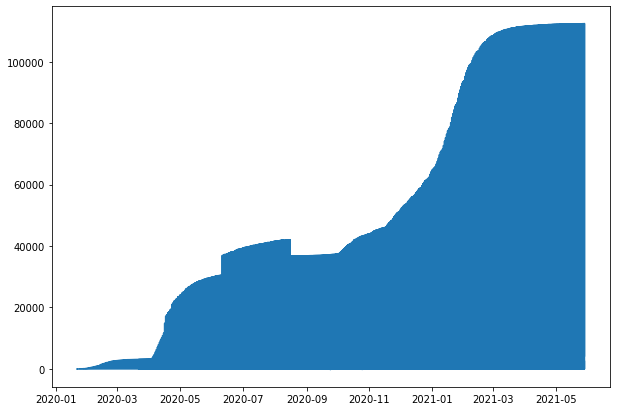

In [ ]:
plt.rcParams["figure.figsize"]=(10,7)
plt.plot(covid_data['ObservationDate'],covid_data['Deaths'])

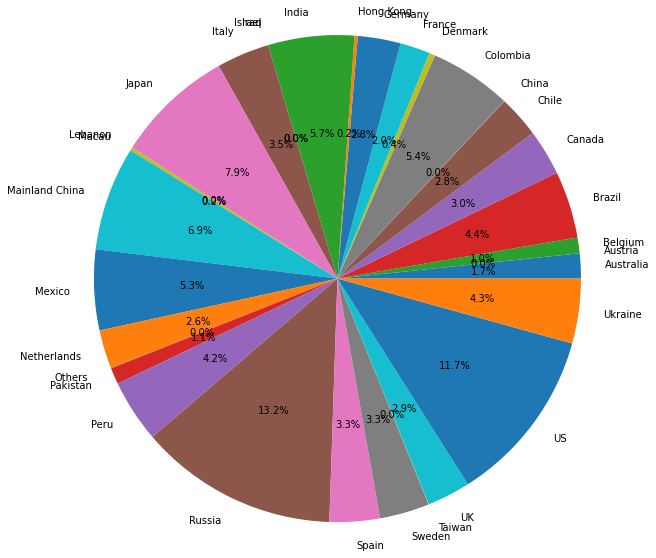

In [ ]:
xaxis=covid_data.groupby(by='Country/Region')['Country/Region'].count().values
yaxis=covid_data.groupby(by='Country/Region')['Country/Region'].count().index.values

plt.pie(x=xaxis, labels = yaxis, radius = 1.6, autopct="%.1f%%")
plt.show()

In [ ]:
corelation =cov.corr()
corelation

,SNo,Confirmed,Deaths,Recovered
SNo,1.000000,0.231279,0.191870,0.157187
Confirmed,0.231279,1.000000,0.881104,0.498839
Deaths,0.191870,0.881104,1.000000,0.421546
Recovered,0.157187,0.498839,0.421546,1.000000


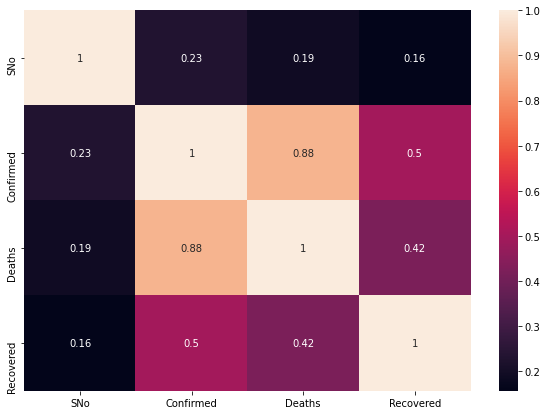

In [ ]:
sns.heatmap(corelation,annot=True)

In [ ]:
time_data = pd.read_csv('/content/time_series_covid_19_confirmed.csv')
time_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


Drop all the null values that dataset has

In [ ]:
time_data = time_data.drop(labels='Province/State', axis = 1)
time_data = pd.DataFrame.dropna(time_data, axis = 0, how = 'any')

In [ ]:
time_data.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,...,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,58037,58214,58312,58542,58730,58843,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162,61455,61755,61842,62063,62403,62718,63045,63355,63412,63484,63598,63819,64122,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129842,129980,130114,130270,130409,130537,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510,131577,131666,131723,131753,131803,131845,131890,131939,131978,132015,132032,132071,132095,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,119992,120174,120363,120562,120736,120922,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473,123692,123900,124104,124288,124483,124682,124889,125059,125194,125311,125485,125693,125896,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456
3,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12874,12917,12942,13007,13024,13060,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363,13390,13406,13423,13429,13447,13470,13470,13510,13510,13510,13555,13569,13569,13569,13569,13569,13569,13569,13664,13671,13682,13693,13693
4,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24661,24883,25051,25279,25492,25609,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921,28201,28477,28740,28875,29146,29405,29695,30030,30354,30637,30787,31045,31438,31661,31909,32149,32441,32623,32933,33338,33607,33944,34180


In [ ]:
# scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Choose best K using Euclidean distance by elbow method

In [ ]:

from scipy.spatial.distance import cdist

cl = data1[['Lat','Long']]
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 12)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(cl)
    kmeanModel.fit(cl)
 
    distortions.append(sum(np.min(cdist(cl, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / cl.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(cl, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / cl.shape[0]
    mapping2[k] = kmeanModel.inertia_

Plot values of k and Distortion graph

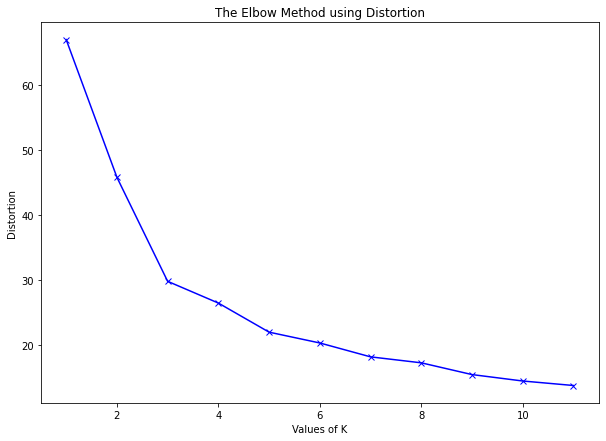

In [ ]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

From above diagram we can say number of clusters will be 3 since above graph is kind of constant after cluster=3

In [ ]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
km.fit(cl)
centroid = km.cluster_centers_
centroid

array([[ 24.08865023,  20.51825542],
       [ 17.89219844, -78.0271269 ],
       [ 16.30080845, 117.77545982]])

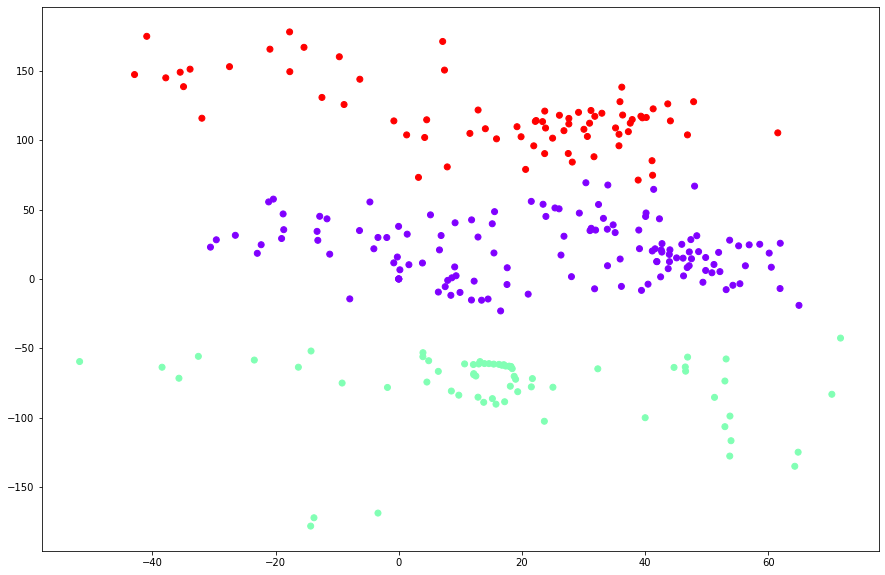

In [ ]:

plt.scatter(cl['Lat'],cl['Long'],c=km.labels_,cmap='rainbow')

In [ ]:
# Creating Basemap
import folium
m3=folium.Map(location=[24.08865023,  20.51825542],zoom_start=11)
#fig3.add_child(m3)

#Adding markers to the map
folium.Marker(location=[24.08865023,  20.51825542],popup='<h3 style="color:green;">Marker0</h3>',tooltip='Click here to see Popup').add_to(m3)
folium.Marker(location=[17.89219844, -78.0271269],popup='<h3 style="color:green;">Marker1</h3>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)
folium.Marker(location=[16.30080845, 117.77545982],popup='<h3 style="color:green;">Marker2</h3>',tooltip='<strong>Click here to see Popup</strong>').add_to(m3)

m3
